# Practical example

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
data = data.drop(['Model'],axis=1)
data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [4]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [5]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [6]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Feature selection

### Exploring the PDFs

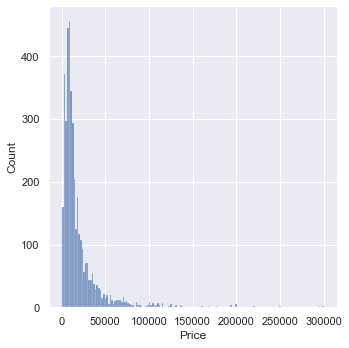

In [7]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.displot(data_no_mv['Price'])

### Dealing with outliers

In [8]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.95)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000


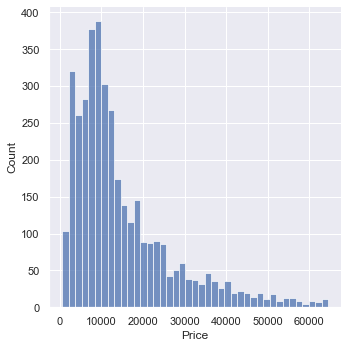

In [9]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.displot(data_1['Price'])

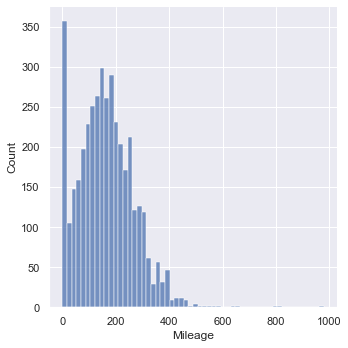

In [10]:
# We can treat the other numerical variables in a similar way
sns.displot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.95)
data_2 = data_1[data_1['Mileage']<q]

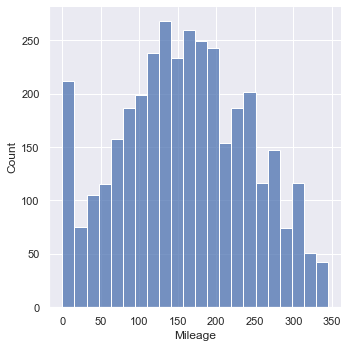

In [12]:
# This plot looks kind of normal, doesn't it?
sns.displot(data_2['Mileage'])

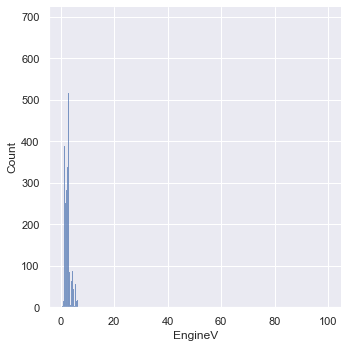

In [13]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.displot(data_no_mv['EngineV'])

In [14]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
q = data_2['EngineV'].quantile(0.95)
data_3 = data_2[data_2['EngineV']<q]

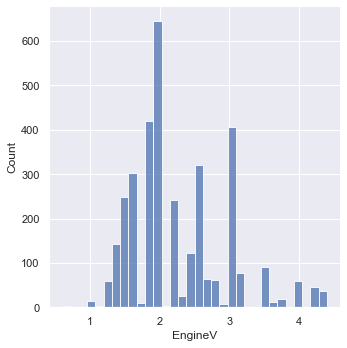

In [15]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.displot(data_3['EngineV'])

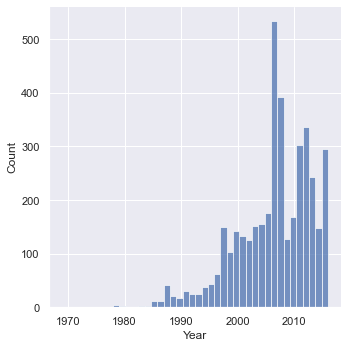

In [16]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.displot(data_no_mv['Year'])

In [17]:
# I'll simply remove them
q = data_3['Year'].quantile(0.05)
data_4 = data_3[data_3['Year']>q]

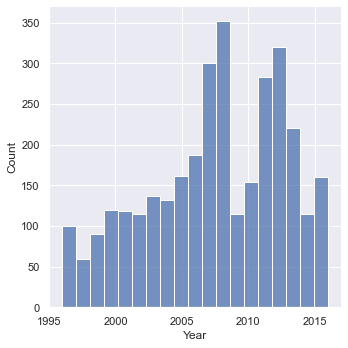

In [18]:
# Here's the new result
sns.displot(data_4['Year'])

In [19]:
# attempt at cleaning out model - progress: removed models that have <5 occurences in new dataframe but cant do it in the source
#for model in data_4['Model'].unique():
 #   np.count()

#values, counts = np.unique(data_4['Model'], return_counts=True)
#values, counts
#model_df = pd.DataFrame(data = values, columns = ['Model'])
#model_df['Occurences'] = counts
#model_df['More than 5 occurences'] = model_df['Occurences'] > 5
#model_df.drop(['More than 5 occurences'],axis=1)
#rm_model_indexes = model_df[model_df['Occurences'] < 5].index
#model_df.drop(rm_model_indexes, inplace = True)
#data_4 = data_4.reset_index(drop=True)

#data_5 = data_4.drop(rm_model_indexes, inplace = True)
#data_5.head()
#for occurence in model_df:
#    model_df.drop(['Model'], axis=0)
#data_5 = np.delete(data_4, model_df['Occurences'] < 5)
#data_5
#model_df = pd.DataFrame(data = [values, counts], columns = ['Model', 'Occurences'])
#data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [20]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [21]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3241,3241.000000,3241,3241.000000,3241.000000,3241,3241,3241.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,769,NaN,1183,NaN,NaN,1581,2916,NaN
mean,NaN,15406.708442,NaN,155.431965,2.272154,NaN,NaN,2007.430114
std,NaN,11790.284824,NaN,82.188224,0.702496,NaN,NaN,4.925006
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,7650.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11500.000000,NaN,155.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,19500.000000,NaN,215.000000,2.700000,NaN,NaN,2012.000000


## Checking the OLS assumptions

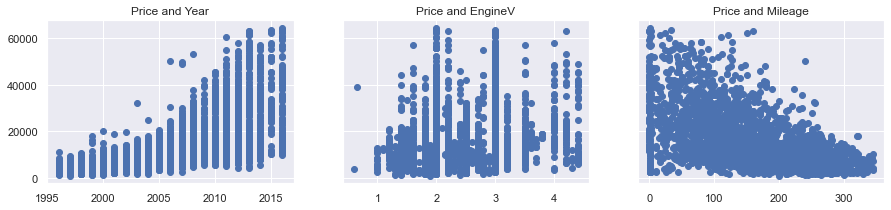

In [22]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

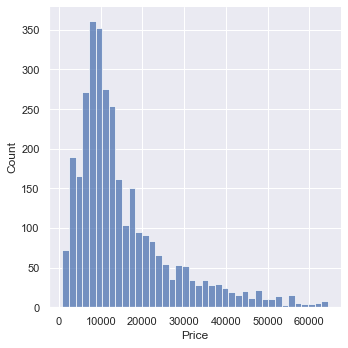

In [23]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.displot(data_cleaned['Price'])

### Relaxing the assumptions

In [24]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,7.244228
...,...,...,...,...,...,...,...,...,...
3236,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3237,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3238,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3239,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Log Price and Mileage')

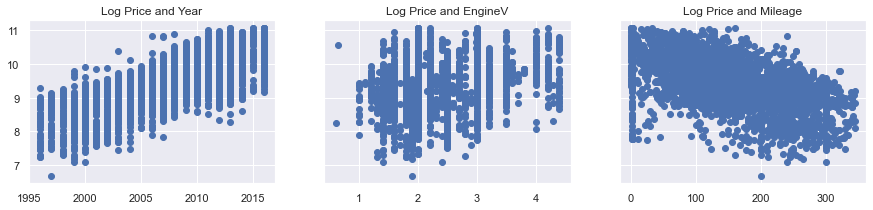

In [25]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


#plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [26]:
# Since we will be using the log price variable, we can drop the old 'Price' one
#data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,7.244228


### Multicollinearity

In [27]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [29]:
# Let's explore the result
vif

,VIF,Features
0,4.638453,Mileage
1,13.522045,Year
2,11.662256,EngineV


In [30]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
#data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity = data_cleaned

## Create dummy variables

In [31]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [32]:
# Here's the result
data_with_dummies.head()

,Price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,23000.0,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,18300.0,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,14200.0,200,2.7,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,10799.0,193,1.5,2012,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1400.0,212,1.8,1999,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


### Rearrange a bit

In [33]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,9.560997,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,9.287209,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,7.244228,212,1.8,1999,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


## Feature selection

In [36]:
from sklearn.feature_selection import f_regression
# The target(s) (dependent variable) is 'log price'
y = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
x = data_preprocessed.drop(['log_price'],axis=1)

p_values = f_regression(x,y)[1]

p_values_table = pd.DataFrame(data=x.columns.values, columns=['Features'])
p_values_table['p-values'] = p_values
p_values_table
# Consider we drop all above 0.01 - edit: after dropping: it makes predictions less accurate
#data_preprocessed = data_preprocessed.drop(['Body_other', 'Engine Type_Other'], axis=1)
#data_preprocessed

,Features,p-values
0,Mileage,2.138508e-260
1,EngineV,3.391489e-81
2,Year,0.000000e+00
3,Brand_BMW,2.071838e-08
4,Brand_Mercedes-Benz,2.132875e-03
5,Brand_Mitsubishi,1.004147e-03
6,Brand_Renault,1.830575e-42
7,Brand_Toyota,1.687627e-20
8,Brand_Volkswagen,5.782263e-03
9,Body_hatch,6.664994e-10


## Linear regression model

### Declare the inputs and the targets

In [37]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [38]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [39]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [40]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [41]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

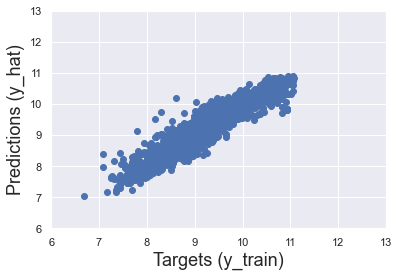

In [43]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

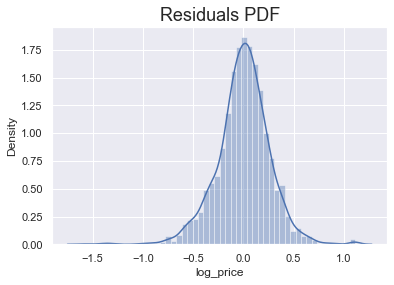

In [44]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [45]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.8736099019756496

### Finding the weights and bias

In [46]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.378250418157998

In [47]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.06395107,  0.18682342,  0.43670966,  0.03047604, -0.00482286,
       -0.134561  , -0.20116122, -0.07081121, -0.09588602, -0.08693798,
       -0.06586111, -0.12406888, -0.08550853, -0.14824599, -0.02960277,
       -0.01653675, -0.03898953,  0.25254393])

In [48]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.063951
1,EngineV,0.186823
2,Year,0.436710
3,Brand_BMW,0.030476
4,Brand_Mercedes-Benz,-0.004823
5,Brand_Mitsubishi,-0.134561
6,Brand_Renault,-0.201161
7,Brand_Toyota,-0.070811
8,Brand_Volkswagen,-0.095886
9,Body_hatch,-0.086938


In [49]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

## Testing

In [50]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

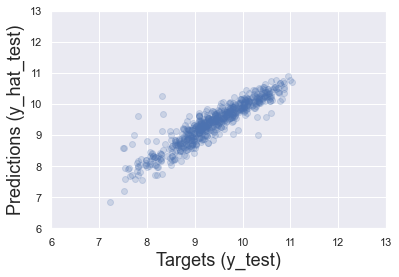

In [51]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,6014.704309
1,12937.513800
2,11048.076245
3,25339.501747
4,6092.806354


In [53]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,6014.704309,NaN
1,12937.513800,18300.0
2,11048.076245,NaN
3,25339.501747,NaN
4,6092.806354,NaN
...,...,...
644,8371.645471,16999.0
645,29811.658398,NaN
646,13744.288352,NaN
647,4045.195501,NaN


In [54]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     8.974618
1     9.104869
2     9.495519
3    10.558414
4     8.942461
Name: log_price, dtype: float64

In [55]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6014.704309,7900.0
1,12937.513800,8999.0
2,11048.076245,13300.0
3,25339.501747,38500.0
4,6092.806354,7650.0
...,...,...
644,8371.645471,7200.0
645,29811.658398,32500.0
646,13744.288352,16800.0
647,4045.195501,5000.0


In [56]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [57]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6014.704309,7900.0,1885.295691,23.864502
1,12937.513800,8999.0,-3938.513800,43.766127
2,11048.076245,13300.0,2251.923755,16.931758
3,25339.501747,38500.0,13160.498253,34.183112
4,6092.806354,7650.0,1557.193646,20.355473
...,...,...,...,...
644,8371.645471,7200.0,-1171.645471,16.272854
645,29811.658398,32500.0,2688.341602,8.271820
646,13744.288352,16800.0,3055.711648,18.188760
647,4045.195501,5000.0,954.804499,19.096090


In [58]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,649.000000,649.000000,649.000000,649.000000
mean,14493.256013,15243.816333,750.560320,22.350935
std,9300.798109,11283.424257,4568.985785,37.515855
min,945.320634,1389.000000,-24071.672880,0.050502
25%,7260.132702,7300.000000,-1505.794422,7.906562
50%,12428.131926,11500.000000,111.597776,15.893694
75%,19395.286333,20500.000000,2210.860631,26.679691
max,53097.199665,61500.000000,24020.593869,587.113973


In [59]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
309,12793.54,12800.00,6.46,0.05
510,6204.43,6200.00,-4.43,0.07
237,18925.09,18900.00,-25.09,0.13
290,33059.65,33000.00,-59.65,0.18
532,12539.08,12500.00,-39.08,0.31
542,6676.56,6700.00,23.44,0.35
494,25608.67,25500.00,-108.67,0.43
301,21993.88,22100.00,106.12,0.48
116,9356.12,9300.00,-56.12,0.60
260,26973.17,26800.00,-173.17,0.65
